This model aims to analyze and explore the NBA player performance, how different the players are from each other and how the players can be grouped together based on common characteristics. 

Point guards play one of the most crucial roles on a team because their primary responsibility is to create scoring opportunities for the team. Machine learning technique K-Means clustering will allows us to visualize the types of point guards as well as group similar point guards together. Using 2 features(Assist to Turnover ratio & Points Per Game) allows us to easily visualize the players and will also make it easier to grasp how clustering works. For point guards, it's widely accepted that the Assist to Turnover Ratio is a good indicator for performance in games as it quantifies the number of scoring opportunities that player created. We will also use Points Per Game, since effective Point Guards not only set up scoring opportunities but also take a lot of the shots themselves.

Some of the selected columns are described below (dataset belongs to 2013 - 2014 season):

* player -- name of the player
* pos -- the position of the player
* g -- number of games the player was in
* pts -- total points the player scored
* fg. -- field goal percentage
* ft. -- free throw percentage

In [85]:
## Importing necessary libraries

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import math
import seaborn as sns

warnings.filterwarnings("ignore")

In [86]:
## Reading input file into pandas

nba = pd.read_csv("nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [87]:
# Filtering point guard instances and assigning it to new dataframe

point_guards = nba[nba['pos'] == 'PG']

In [88]:
# Calculating points per game by using each players total points and number of games they played. New column ppg
# will be added to the existing dataframe

point_guards['ppg'] = point_guards['pts'] / point_guards['g']

point_guards[['pts', 'g', 'ppg']].head()

,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


In [89]:
# Calculating assist turnover ratio by dividing total assists (ast) by total turnovers (tov)
# ATR = Assists / Turnovers

# Dropping the players with zero turnovers

point_guards = point_guards[point_guards['tov'] != 0]

point_guards['atr'] = point_guards['ast'] / point_guards['tov']

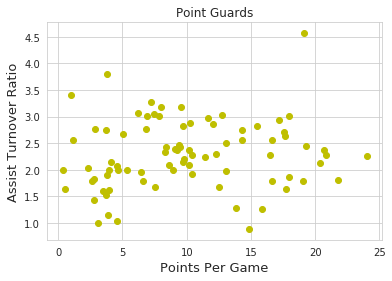

In [90]:
# Creating scatter plot with Points Per Game (ppg) on the X axis and Assist Turnover Ratio (atr) on the Y axis

plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

In [91]:
# Setting up K-Means Clustering with number of clusters = 5

num_clusters = 5

# Using numpy's random function to generate a list, length: num_clusters, of indices

random_initial_points = np.random.choice(point_guards.index, size=num_clusters)

# Using the random indices to create the centroids

centroids = point_guards.loc[random_initial_points]


Text(0, 0.5, 'Assist Turnover Ratio')

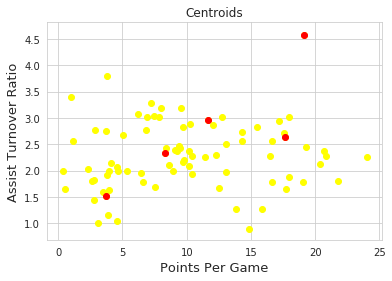

In [92]:
# Plotting the randomly chosen centroids in addition to point guards so check where the centroids lies 

plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

In [93]:
# Function to create a dictionary object 

# key: cluster_id of that centroid's cluster
# value: centroid's coordinates expressed as a list ( ppg value first, atr value second )

def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

In [94]:
# Function calculate_distance which takes in 2 lists 
# (the player's values for ppg and atr and the centroid's values for ppg and atr).

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24

print(calculate_distance(q, p))

2.23606797749979


In [95]:
# Function to assign calculate euclidean distance for each player (row) with the clusters centroid

def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

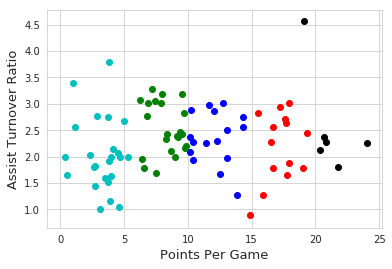

In [96]:
# Function to visualize the clusters with different colors

def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

In [97]:
# Function to recalculate the centroids for each cluster

def recalculate_centroids(df):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        
        # Calculate new centroid using mean of values in the cluster
        
        new_centroid = [np.average(values_in_cluster['ppg']), np.average(values_in_cluster['atr'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)

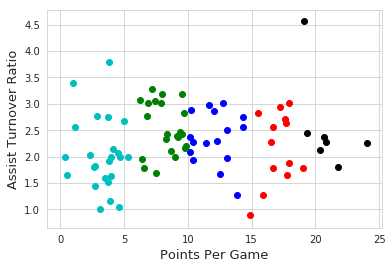

In [98]:
# Assigning the points once again to new clusters and analyse how the clusters shifted

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

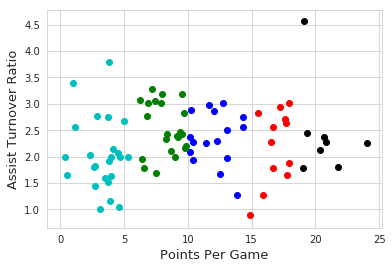

In [99]:
# Recalculating the centroids and shifting the clusters once again

centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)


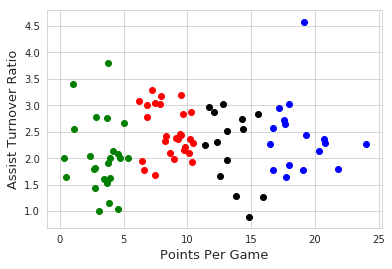

In [100]:
# Implementing sci-kit learn version of K-Means clustering
# There are 4 types of point guards based on each players ATR and PPG

from sklearn.cluster import KMeans

num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)


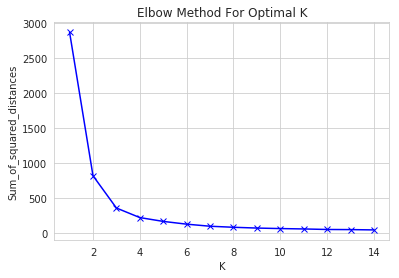

In [101]:
# Using Elbow method to determine the optimal K value
# For each k value, we will initialise k-means and use the inertia attribute to identify the sum of 
# squared distances of samples to the nearest cluster centre.
# Elbow on the arm is at K = 4 (optimal value)

Sum_of_squared_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(point_guards[['ppg', 'atr']])
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()



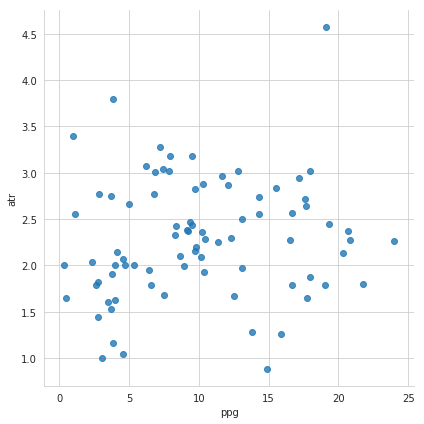

In [102]:
# SNS EDA

sns.set_style('whitegrid')

#sns.lmplot('ppg','attr',data=point_guards, hue='Private',
#           palette='coolwarm',size=6,aspect=1,fit_reg=False)

sns.lmplot('ppg','atr',data=point_guards, palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [103]:
# Printing confusion matrix and classification report 

from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(point_guards['cluster'],kmeans.labels_))
print(classification_report(point_guards['cluster'],kmeans.labels_))

[[14  0  0  0]
 [ 0 17  0  0]
 [ 0  0 24  0]
 [ 0  0  0 27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        27

   micro avg       1.00      1.00      1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [104]:
# Printing the cluster centre coordinates

kmeans.cluster_centers_

array([[13.40207975,  2.22183726],
       [18.88128198,  2.41844274],
       [ 3.25103221,  2.03206018],
       [ 8.61444883,  2.48981711]])

In [105]:
# Printing the k-means labels

kmeans.labels_

array([0, 3, 3, 3, 3, 1, 0, 3, 0, 2, 3, 2, 1, 3, 3, 0, 1, 1, 2, 1, 3, 3,
       2, 2, 3, 3, 3, 0, 1, 3, 0, 2, 0, 1, 2, 1, 1, 0, 3, 1, 2, 3, 3, 2,
       3, 2, 3, 2, 2, 3, 0, 0, 2, 1, 1, 2, 2, 2, 3, 3, 0, 0, 3, 2, 0, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 3, 2, 1, 0, 3, 3, 3], dtype=int32)

In [106]:
# Print the size of the clusters

print(point_guards.groupby('cluster')['ppg', 'atr'].count())

# Print the mean value of each cluster

print(point_guards.groupby('cluster')['ppg', 'atr'].mean())

         ppg  atr
cluster          
0         14   14
1         17   17
2         24   24
3         27   27
               ppg       atr
cluster                     
0        13.402080  2.221837
1        18.881282  2.418443
2         3.251032  2.032060
3         8.614449  2.489817


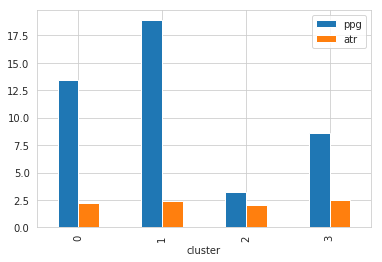

In [107]:
# Plot cluster centers to visualize clusters

point_guards.groupby('cluster')['ppg','atr'].mean().plot(legend=True, kind='bar')
plt.show()

In [108]:
# Get the name column of top 5 players in each cluster
# Top players in each cluster are representative of the overall characteristics of the cluster 

for cluster in point_guards['cluster'].unique():
    print(cluster, point_guards[point_guards['cluster'] == cluster]['player'].values[:5])

0 ['D.J. Augustin' 'Avery Bradley' 'Trey Burke' 'Darren Collison'
 'Jrue Holiday']
3 ['Leandro Barbosa' 'Jose Barea' 'Jerryd Bayless' 'Steve Blake'
 'Aaron Brooks']
1 ['Eric Bledsoe' 'Michael Carter-Williams' 'Mike Conley' 'Stephen Curry'
 'Monta Ellis']
2 ['Dwight Buycks' 'Isaiah Canaan' 'Toney Douglas' 'Diante Garrett'
 'Jorge Gutierrez']


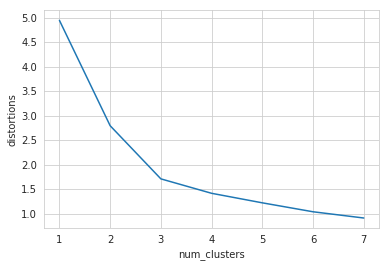

In [114]:
## Implementing clustering using kmeans and vq from scipy.cluster
    
from scipy.cluster.vq import kmeans, vq


## Creating Elbow plot to determine optimal K value

distortions = []
num_clusters = range(1, 8)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(point_guards[['ppg', 'atr']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

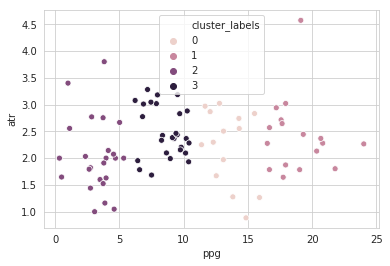

In [115]:
# Generate cluster centers
cluster_centers, distortion = kmeans(point_guards[['ppg', 'atr']], 4)

# Assign cluster labels
point_guards['cluster_labels'], distortion_list = vq(point_guards[['ppg', 'atr']], cluster_centers)

# Plot clusters
sns.scatterplot(x='ppg', y='atr', 
                hue='cluster_labels', data = point_guards)
plt.show()


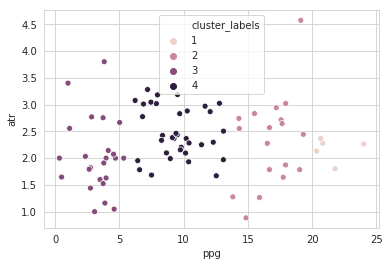

In [116]:
# Implementation using hierarchial clustering (method=ward)
# Same can be implemented using method = single, complete. Results are similar

from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(point_guards[['ppg', 'atr']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
point_guards['cluster_labels'] = fcluster(distance_matrix, 4, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='ppg', y='atr', 
                hue='cluster_labels', data = point_guards)
plt.show()

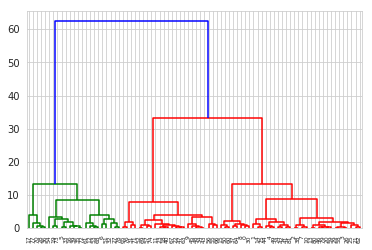

In [117]:
# Computing optimal number of clusters for hierarchial clustering using dendrogram
# Number of suggested clusters = 3

from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram

dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

